# HW3 - Waves


---
# EXPERIMENT 0 - testing and setup
---

In [ ]:
#@title Prepare environment
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pickle import FALSE
#@title Configure experiment

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129           # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'no_rotation'
# caso = 'geo_adj_1d'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: no_rotation ***
Reference Latitude: 45
 >> f0: 0.0001032376 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: 303 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 11.57 days
time step increment, dt: 1000.0s
total # of time steps run: 1000
Saving frequency in time steps: 10
total # of time steps run saved: 100
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h], dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 45
 >> f0: 0.0001032376 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: 303 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 11.57 days
time step increment, dt: 1000.0s
total # of time steps run: 1000
total # of time steps run saved: 100
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 800x800 with 0 Axes>

In [ ]:
def plot_check(it1=0,it2=50):
  # PLOT 2 tims steps (Useful for a quick check)
  plt.figure()
  t=it1
  plot(ua[:,:,t], va[:,:,t], ha[:,:,t],ta[t])

  plt.figure()
  t=it2
  plot(ua[:,:,t], va[:,:,t], ha[:,:,t],ta[t])

In [ ]:
# PLOT ANIMATION
from IPython import display
from time import sleep

def video_waves(ua,va,ha,ta):
  plt.axis([0, 10, 0, 10])
  for t in range(0,len(ta)-1,3):
      plot(ua[:,:,t], va[:,:,t], ha[:,:,t],ta[t])
      display.display(plt.gcf())
      display.clear_output(wait=True)
      sleep(0.02)

#video_waves(ua,va,ha,ta)

In [ ]:
def lat_from_eq(dist):
  lat = dist/a
  return np.rad2deg(lat)
lat_from_eq(1627906)

14.640110382047371

In [ ]:
def plot_hovmuller(ha,phi,amp=0.1,ilatr = np.where(hy==0)[1][0], cbar = True):
  # PLOT HOVMULLER at the reference latitude
  plt.pcolor(ha[:,ilatr,:].T,cmap='bwr',vmin=-amp,vmax=amp)
  plt.xlabel('x-index')
  plt.ylabel('time steps')
  plt.title("Hovmuller Diagram at {}°N".format(round(lat_from_eq(hy[:,ilatr])[0]+phi,2)))
  plt.grid()
  if cbar == True:
    plt.colorbar()

def hov_anim(ha,phi,amp=0.1):
  for i in range(0,len(ha),4):
      plot_hovmuller(ha, phi,ilatr = i, cbar = False)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      sleep(0.1)

---------------------------


# EXPERIMENT 1

In [ ]:
from pickle import FALSE
#@title Configure experiment 1

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp1-no_rotation'
# caso = 'geo_adj_1d'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp1-no_rotation ***
Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Equatorial Rossby deformation radius, Ld: 0 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 11.57 days
time step increment, dt: 1000.0s
total # of time steps run: 1000
Saving frequency in time steps: 10
total # of time steps run saved: 100
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 11.57 days
time step increment, dt: 1000.0s
total # of time steps run: 1000
total # of time steps run saved: 100
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 800x800 with 0 Axes>

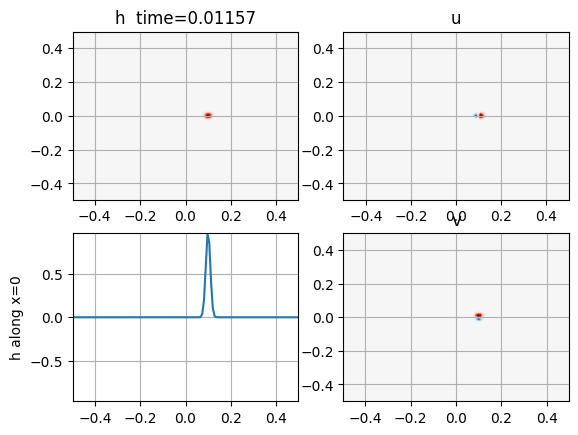

<Figure size 640x480 with 0 Axes>

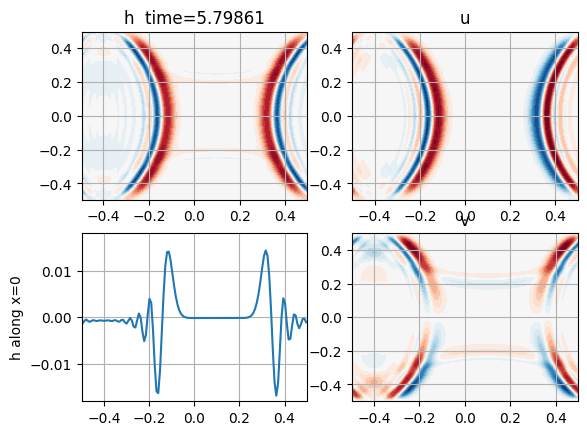

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

- What speed to you expect the gravity waves to be propagating at in this model?

EXP1 models non rotational waves, the corresponding linearized shallow water equations are :
$$\frac{\partial u}{\partial t} = -g\frac{\partial h}{\partial x}, \qquad \frac{\partial v}{\partial t} = -g\frac{\partial h}{\partial y}, \qquad \frac{\partial h}{\partial t} + H(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})=0 $$

Plugging in the wave solution  $(u,v,h)= (A_u,A_v,A_h)e^{i(\vec{k} \cdot \vec {x}-\omega t )} = (A_u,A_v,A_h)e^{i(kx + ly -\omega t )}$ we derive the following dispersion relation :
$$\omega = \pm \sqrt{Hg} \sqrt{k^2+l^2}=\pm c\sqrt{k^2+l^2}$$

The expected propagatoin speed of the gravity waves is thus :
$$c=\sqrt{Hg}=\sqrt{9.81\times 100} \approx 31 m/s$$

In [ ]:
print(np.sqrt(9.81)*10)

31.32091952673165


In [ ]:
# Video
#video_waves(ua,va,ha,ta)

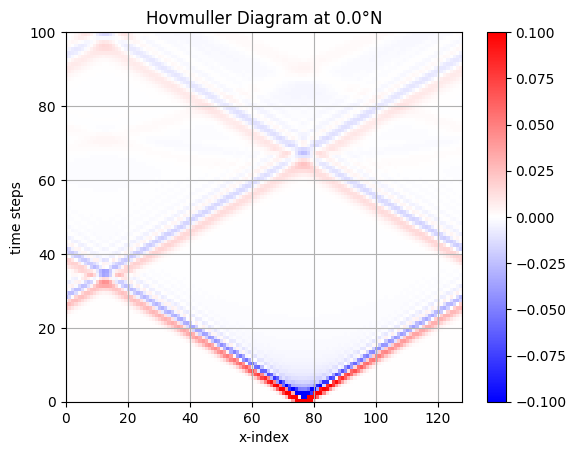

In [ ]:
# HOVMULLER DIAGRAMM with periodic BC
plot_hovmuller(ha,phi)

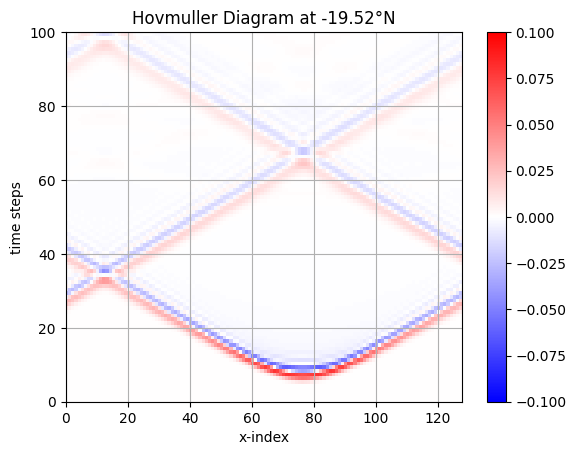

In [ ]:
plot_hovmuller(ha,phi,0.1,50)

- Can you identify the wave front propagating?
- Make an estimation of the phase speed of the front?

A wave front has the same color throughout, here the wave front of maximum positive amplitude is in red and decays as it travels both east and west. The same happens for blue which is the wave front of minimum negative amplitude.

To estimate the phase speed of any of the fronts, we calculate the slope of the line on the Hovmuller diagram, taking into acount that one "rectangle" is of side $dx = \frac{L_x}{n_x} = \frac{2e7}{128}m = 156.25\times 10^3m$ and $dt = 10 \times 1000s = 10^4s$  (10 is the saving frequency in time step).
$$slope = \frac{20dt}{40dx} \quad \implies \quad c \approx \frac{2dx}{dt} = \frac{4\times 10^7}{128\times10^4} \approx 31 m/s$$

In [ ]:
ha.shape

(128, 129, 100)

In [ ]:
print(4e3/128)

31.25


----------------------
# EXPERIMENT 2

- What will happen around the perturbation shown above after 10 days?
- Do you still expect gravity waves radiating outward from the disturbance?

Case 2 models shallow water rotational waves on the f-plane at latitude $20°N$, the corresponding linearized shallow water equations are :
$$\frac{\partial u}{\partial t} - f_0 v= -g\frac{\partial h}{\partial x}, \qquad \frac{\partial v}{\partial t} + f_0 u = -g\frac{\partial h}{\partial y}, \qquad \frac{\partial h}{\partial t} + H(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})=0 $$

Plugging in the wave solution $(u,v,h)= (A_u,A_v,A_h)e^{i(\vec{k} \cdot \vec {x}-\omega t )} = (A_u,A_v,A_h)e^{i(kx + ly -\omega t )}$ we derive the following dispersion relation :
$$ 0 = \omega (\omega^2-f_0^2 - gH (k^2+l^2))=\omega (\omega^2-f_0^2 - c^2 K^2)$$
Thus
$\omega = 0$ or $\omega = \pm \sqrt{f_0^2+c^2K^2}$.

In the first case we have time independent flow corresponding to geostrophic balance. In the second, we have long, dispersive shallow water gravity waves modified by rotation called Poincaré waves. So after 10 days I expect to see a constant perturbation which has not propagated in space and very small leftovers of the dispersed Poincaré waves that radiated outward from the disturbance at the initial time only and that can be considered gravity waves in the shortwave limit. So there are no longer any gravity waves radiating from the disturbance after 10 days.

In [ ]:
from pickle import FALSE
#@title Configure experiment 2

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp2-fplane_rotation'
# caso = 'geo_adj_1d'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp2-fplane_rotation ***
Reference Latitude: 20
 >> f0: 4.99349e-05 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: 627 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
Saving frequency in time steps: 10
total # of time steps run saved: 120
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 20
 >> f0: 4.99349e-05 [s^-1]
 >> beta: 0 [m^-1.s^-1]
Rossby deformation radius, Ld: 627 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
total # of time steps run saved: 120
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 800x800 with 0 Axes>

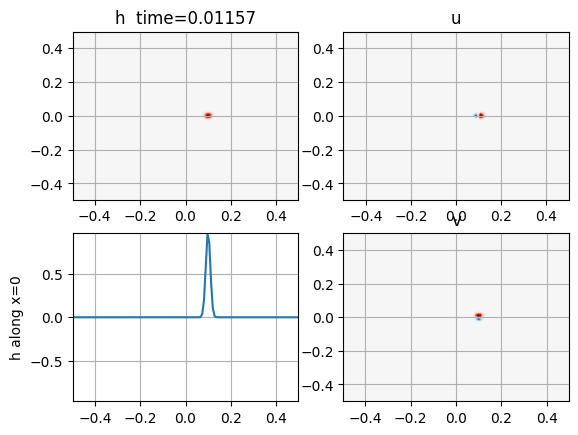

<Figure size 640x480 with 0 Axes>

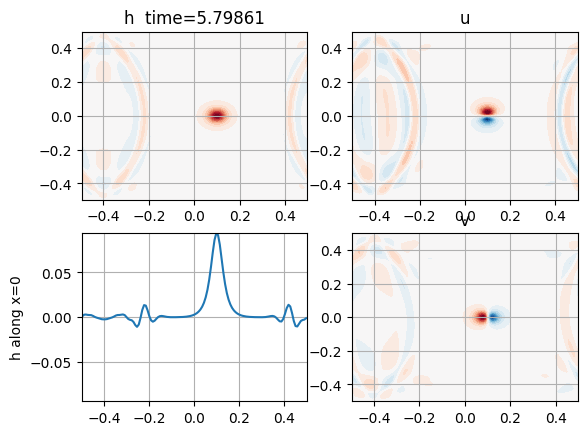

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

In [ ]:
# Video
#video_waves(ua,va,ha,ta)

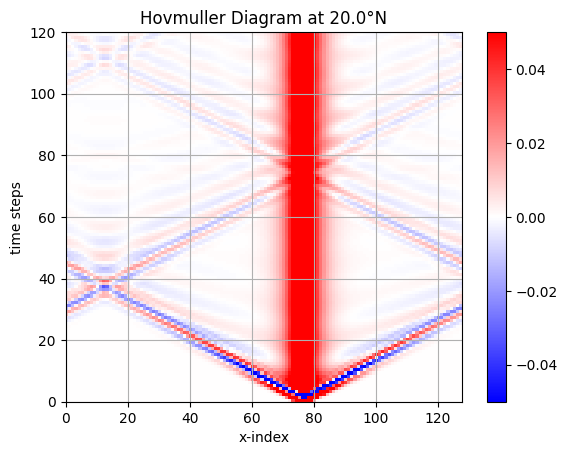

In [ ]:
# HOVMULLER DIAGRAMM with periodic BC
plot_hovmuller(ha,phi,0.05)

In [ ]:
#plot_hovmuller(ha,phi,0.1,50)

- Compare and contrast EXP#1 and EXP2?
- What can you say regarding the short wave limit discussed in Chapter 4 page 72?

In EXP1 we were at the equator where geostrophic balance doesn't hold so we didn't see the $\omega = 0$ solution as expected. In EXP2, we are now at 20°N latitude, and see the geostrophic balance solution ($\omega = 0$).

As for the Poincaré waves : in the short wave limit, they are just the gravity waves of EXP1. Indeed the short wave length limit is :
$$K^2 \gg \frac{f_0^2}{gH} \iff k^2 \gg \frac{1}{L_d^2} \iff (2\pi)^2L_d^2 \gg \lambda^2$$
where $K=k$ since we are interested in propagation in the zonal direction setting $l=0$; $L_d = \sqrt{gH}/f_0$ is the Rossby deformation radius; and $\lambda = 2\pi / k $ is the zonal wave length.

Here $L_d \approx 627 km$ and $λ \approx 8 dx$ hence :

In [ ]:
left = (2*np.pi*627)**2
right = (8*156.25**2)
print(round(left), '>>', round(right)) # in "km^2"

15520111 >> 195312


and the short wave approximation holds.

----------------
# EXPERIMENT 3

In [ ]:
from pickle import FALSE
#@title Configure experiment 3

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp3-betaplane_rotation'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp3-betaplane_rotation ***
Reference Latitude: 20
 >> f0: 4.99349e-05 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: 627 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 23.15 days
time step increment, dt: 1000.0s
total # of time steps run: 2000
Saving frequency in time steps: 10
total # of time steps run saved: 200
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 20
 >> f0: 4.99349e-05 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: 627 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 20000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 23.15 days
time step increment, dt: 1000.0s
total # of time steps run: 2000
total # of time steps run saved: 200
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 800x800 with 0 Axes>

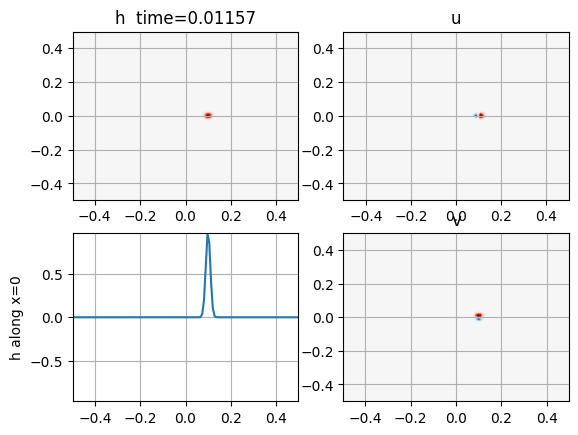

<Figure size 640x480 with 0 Axes>

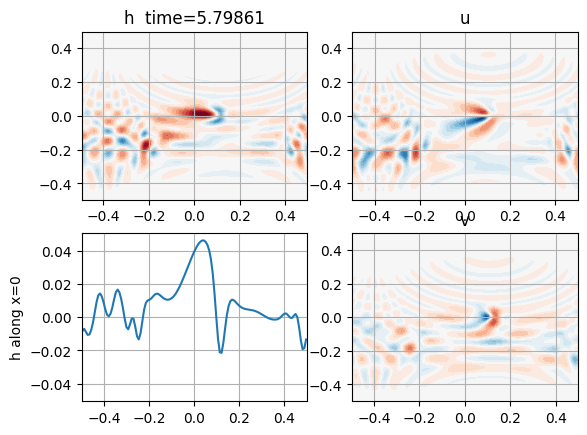

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

In [ ]:
# Video
#video_waves(ua,va,ha,ta)

- Now that the beta effect is present what happens to the initial perturbation after 10 days?
- What types of waves radiate from the disturbance?
- Is the initial perturbation slowly moving in any direction?

Now that the beta effect is present, the initial perturbation after 10 days, which corresponds to time step 86.4 ($10 \text{ days} / dt \text{ seconds} = 10 \times 24 \times 3600 / 10000 = 86.4$) has created two different kinds of waves : the Poincaré waves which radiate only at the start and then propagate and the Rossby waves which transport the initial perturbation slowly to the west.

The Rossy waves are derived as follows from the SWEs:

$$(1) \quad \frac{\partial u}{\partial t} - fv + g\frac{\partial h}{\partial x} = 0, \qquad (2) \quad \frac{\partial v}{\partial t} + fu + g\frac{\partial h}{\partial y} = 0, \qquad (3) \quad \frac{\partial h}{\partial t} + H(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})=0 $$

$\partial_x(2) - \partial_y(1)$ with $\zeta=\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}$ the relative vorticity:

$$(4) \quad \frac{\partial \zeta}{\partial t} + f (\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}) + v \frac{\partial f}{\partial y} = 0$$

$(4) - \frac{f}{H}(3)$ and recalling $\frac{\partial f}{\partial y}=\beta$:

$$(5) \quad \frac{\partial \zeta}{\partial t} + v\beta - \frac{f}{H}\frac{\partial h}{\partial t} = 0 $$


Plugging in the wave solution $(u,v,h)= (A_u,A_v,A_h)e^{i (\vec{k} \cdot \vec{x} -\omega t)} = (A_u,A_v,A_h)e^{i(kx + ly -\omega t )}$ we get : $ k \omega A_v - l \omega A_u + A_v \beta = -i\frac{f}{H}\omega A_h$. This holds only if the real parts of each side are equal i.e.   $ k \omega Re(A_v) - l \omega Re(A_u) + Re(A_v) \beta = \frac{f}{H}\omega Re(-iA_h) = \frac{f}{H}\omega Im(A_h)= 0 $ since we want real solutions.
Noting $Re(A_u) = a_u$ and $Re(A_v) = a_v$ this yields :

$$ k \omega a_v - l \omega a_u + a_v \beta = 0$$

we obtain the following dispersion relation : $$ \omega = \frac{a_v \beta}{l a_u - k a_v}$$

for zonal propagation ($l=0$) this becomes :  $$ \omega = -\frac{\beta}{k}$$

This corresponds to the dispersion relation of a zonal Rossby wave with zero mean flow and infinite deformation radius which is indeed the case since $L_d = \sqrt{gH}/f_0 = + \infty$ for $f_0 = 0$.

Note : before linearizing the SWEs we can reason similarly to show that potential vorticity is conserved as in appendix E of Webster's book.


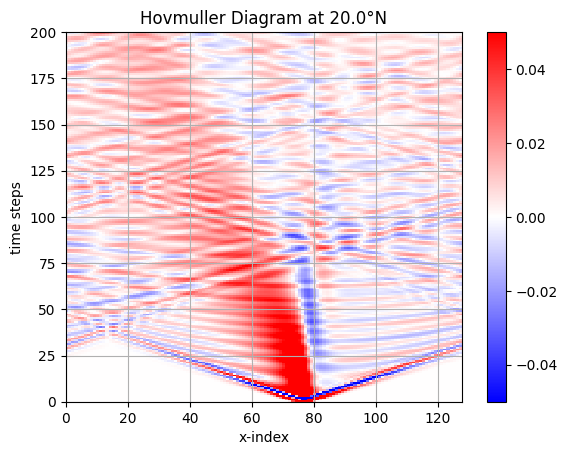

In [ ]:
# HOVMULLER DIAGRAMM with periodic BC
plot_hovmuller(ha,phi,0.05)

- Identify all wave types you see.
- Compare theoretical and simulated phase speed.

The fast waves propagating both east and west are the Poincaré waves. In the short wave limit, their simulated phase speed is  $c \approx \frac{2dx}{dt} \approx 31 m/s$ that we deduce from the Hovmuller diagram as in EXP1 and their theoretical phase speed is $c=\sqrt{gH}\approx 31 m/s$.

The much slower waves propagating west are Rossby waves. The phase and group speeds are : $$\frac{\omega}{k} = \frac{-\beta}{k^2}, \qquad \frac{\partial \omega}{\partial k} = \frac{\beta}{k^2}.$$

This is coherent with the Hovmuller diagrams above where the Rossby waves propagate westward and waves of long wave length travel more quickly.

In [ ]:
s = -2e3/128/3
print('Simulated phase velocity : s=dx/3dt =',s, 'm/s')
k = np.sqrt(-beta/s)
print('The corresponding wave number is : k=sqrt(-beta/s)', k)
lam = 2e-3*np.pi/k
print('The wavelength is lambda = 2pi/k ', lam,'km')
print('On the Hovmuller diagram, this is about', round(lam/dx*1000), '"pixels" long.')

Simulated phase velocity : s=dx/3dt = -5.208333333333333 m/s
The corresponding wave number is : k=sqrt(-beta/s) 2.097602730620784e-06
The wavelength is lambda = 2pi/k  2995.412436996629 km
On the Hovmuller diagram, this is about 19 "pixels" long.


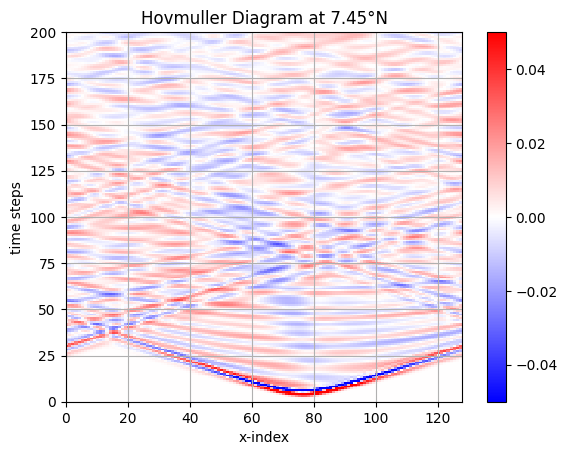

In [ ]:
plot_hovmuller(ha,phi,0.05,55)

-------------------------
# EXPERIMENT 4

In [ ]:
from pickle import FALSE
#@title Configure experiment 4

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp4-betaplane_small'
# caso = 'geo_adj_1d'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp4-betaplane_small ***
Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Equatorial Rossby deformation radius, Ld: 1169 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
Saving frequency in time steps: 10
total # of time steps run saved: 120
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 200.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
total # of time steps run saved: 120
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 1066.67x800 with 0 Axes>

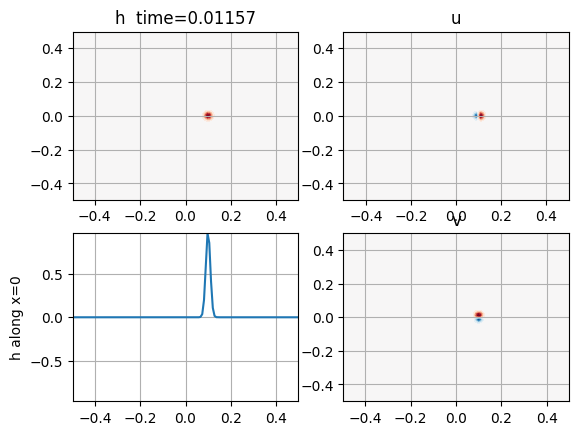

<Figure size 640x480 with 0 Axes>

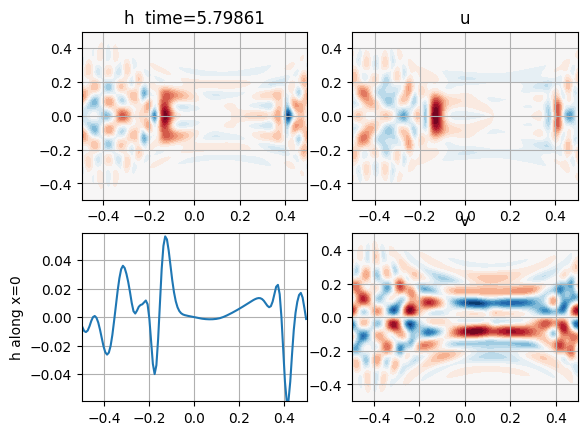

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

In [ ]:
# Video
#video_waves(ua,va,ha,ta)

Changing the latitude to 0, the Equator, introduces a fundamental difference with respect to the previous case. In fact, the equatorial zone now acts as a waveguide trapping disturbances in the vicinity of the equator.
- Briefly describe the evolution of the fields (h, u, and v)

All three have symmetric amplitude with respect to the equator. For h and u, the direction is also symmetric but for v it is antisymmetric : the flow is either converging towards or diverging away from the equator.

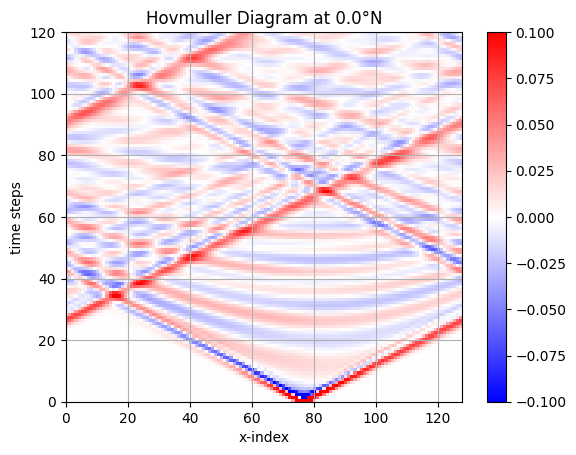

In [ ]:
# HOVMULLER DIAGRAMM
plot_hovmuller(ha,phi)

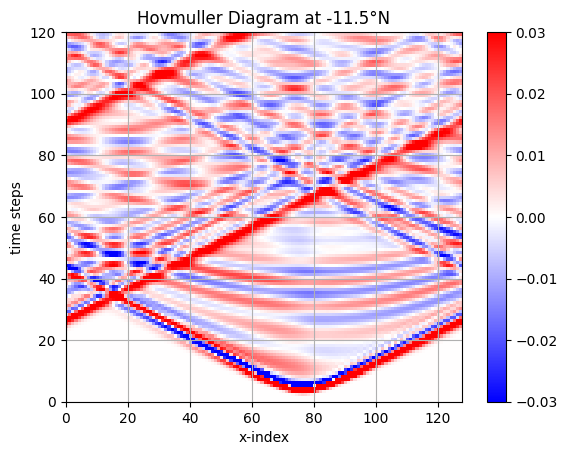

In [ ]:
plot_hovmuller(ha,phi,0.03,53)
#hov_anim(ha,phi)

- Identify all wave types you see / what type of waves radiate from the disturbance ?

In experiment 4, we are in the beta plane approximation at the equator. There are Poincaré waves travelling both west and east. There are also two Kelvin waves travelling east and acting as walls for each other. There are no Rossby waves at the surface since the radius of the disturbance is much smaller than the equatorial Rossby deformation radius : 200 km << 1169 km.

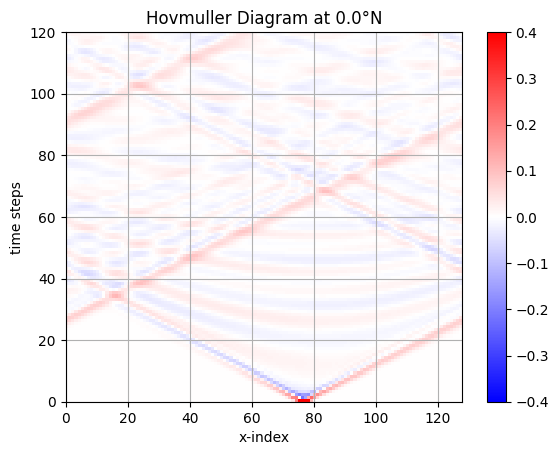

In [ ]:
# HOVMULLER DIAGRAMM for comparison with the next experiment
plot_hovmuller(ha,phi,0.4)

----------------
# EXPERIMENT 5

In [ ]:
from pickle import FALSE
#@title Configure experiment 5

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp5-betaplane_large'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp5-betaplane_large ***
Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Equatorial Rossby deformation radius, Ld: 1169 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 1000.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
Saving frequency in time steps: 10
total # of time steps run saved: 120
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 1000.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 13.89 days
time step increment, dt: 1000.0s
total # of time steps run: 1200
total # of time steps run saved: 120
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 1066.67x800 with 0 Axes>

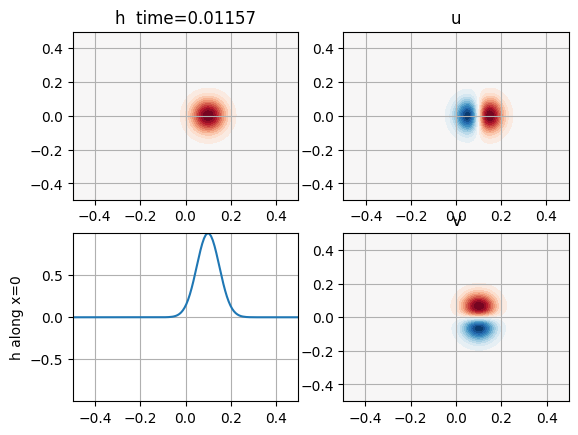

<Figure size 640x480 with 0 Axes>

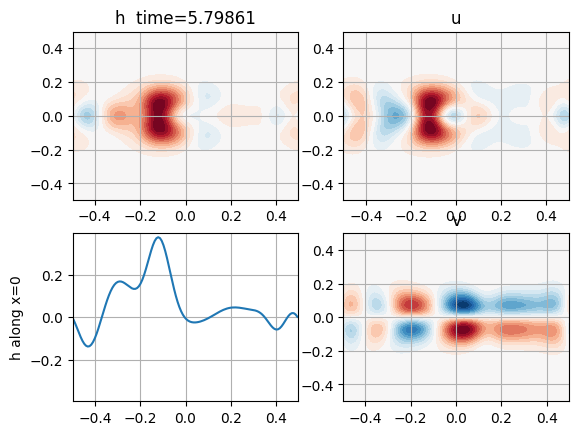

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

In [ ]:
# Video
#video_waves(ua,va,ha,ta)

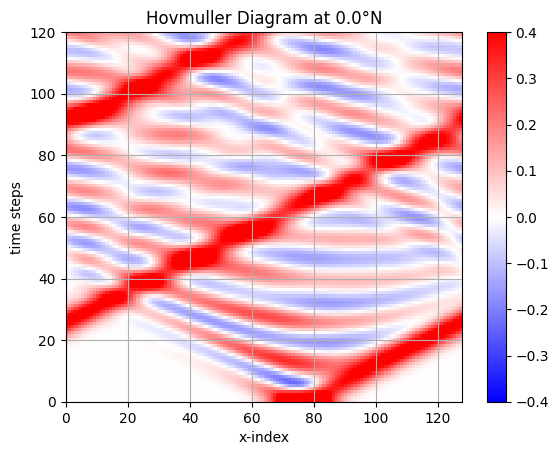

In [ ]:
# HOVMULLER DIAGRAMM
plot_hovmuller(ha,phi,0.4)

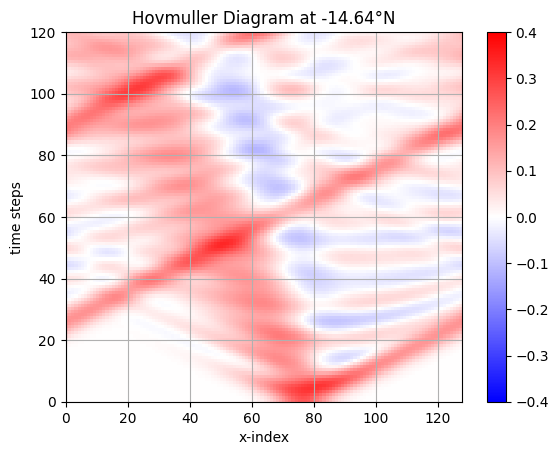

In [ ]:
plot_hovmuller(ha,phi,0.4,50)

- How does this experiment compare with the previous one?
- Identify all wave types you see.
- Compare theoretical and simulated phase speed.

This experiment has the same setup as the previous one, ie we are at the equator using the beta plane approximation and have periodic boundary conditions but this time the radius of disturbance is 5 times greater (1e3km/2e2km=5). We see the same types of waves namelly Poincaré waves travelling both west and east and Kelvin waves travelling east.
Since the disturbance is much greater the amplitude of the waves are also much greater as can be seen comparing both Hovmuller diagrams plotted using the same scale : EXP4 is much more faded because has lower amplitude values, EXP5 has more vibrant colors corresponding to greater amplitude.
In addition we now have equatorial Rossby waves, because the radius of disturbance is of the same order of magnitude as the equatorial Rossby deformation radius : 1000 km $\sim$ 1169 km.

Phase speeds are the same as before for Kelvin and Poincaré waves. Looking at the Hovmuller diagramm no longer at the equator but at about 15 degrees north or south of the equator we see the Rossby waves much more clearly and can calulate their phase speed :
$$c \approx \frac{1}{slope} = \frac{dx}{2.5dt} = \frac{2}{2.5 \times 128}  10^{7-4}\approx 6 \, m/s $$

---------------
# EXPERIMENT 6

In [ ]:
from pickle import FALSE
#@title Configure experiment 6

###------------------------- CONFIGURATION ----------------------------------###


####------- Default settings
experiment = '2d'   # set to '1d' or '2d'

### Domain
nx = 128            # Grid point along x
ny = 129            # Grid point along y

H  = 100.0          # [m]  Average depth of the fluid
Lx = 2.0e7          # [m]  Zonal width of domain
Ly = 1.0e7          # [m]  Meridional height of domain


boundary_condition = 'periodic'  # either 'periodic' , 'LRwalls' or allwalls
# 1. Periodic Boundaries
#    - Flow cycles from left-right-left
#    - u[0] == u[nx]
# 2. Solid walls left and right
#    - No zonal (u) flow through the left and right walls
#    - Zero x-derivative in v and h
# 3. Solid walls left, right, top, and bottom
#    - No zonal (u) flow through the left and right walls
#    - No meridional (v) flow through the top and bottom walls



### Coriolis and Gravity (Change Coriolis to zero and see the difference!)
# f = f0 + beta y

phi = 0             # latitude in degree
beta_effect = True  # 'True' or 'False' switch (Set to True for beta-plane)
g = 9.81            # [m.s^-2]

### Diffusion and Friction
nu = 5.0e4          # [m^2.s^-1] Coefficient of diffusion
                    # Without diffusion the numerical scheme is unstable
r = 1.0e-4          # Rayleigh damping at top and bottom of domain
dt = 1000.0         # Timestep [s]

### Location and radius of the disturbance (gaussin bell) in meters [m]
gx = 2.0e6          # x position [m]
gy = 0.0            # y position [m]
gr = 2.0e5          # radius perturbance [m]

### Number of steps
nsteps = 1000
save_interval = 20  # save fields every n steps


### Settings for some predefinite cases

caso = 'exp6-betaplane_walls'
# caso = 'geo_adj_1d'

if caso == 'default':
    print('default case')
elif caso == 'no_rotation':
    phi = 45
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'allwalls'
    save_interval = 10          # save fields every n steps
elif caso =='exp1-no_rotation':
    phi = 0
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp2-fplane_rotation':
    phi = 20
    beta_effect = False
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp3-betaplane_rotation':
    phi = 20
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 2.0e7
    nsteps = 2000
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp4-betaplane_small':
    phi = 0
    beta_effect = True
    gr = 200e3
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp5-betaplane_large':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 1200
    boundary_condition = 'periodic'
    save_interval = 10 # save fields every n steps
elif caso =='exp6-betaplane_walls':
    phi = 0
    beta_effect = True
    gr = 1e6
    Lx = 2.0e7
    Ly = 1.5e7
    nsteps = 2000
    boundary_condition = 'allwalls'
    save_interval = 10 # save fields every n steps
    r = 0 #Remove sponge layer by setting this sponge coefficient to 0


if experiment == '1d':
    boundary_condition = 'LRwalls'

###-------------------------- END EDIT CONF. BLOCK --------------------------###


# Calculate useful quantities
OME = 7.3e-5 # rad/s
a = 6371e3
R = a  *  np.cos(np.deg2rad(phi))
f0 = 2 * OME * np.sin(np.deg2rad(phi))
bswitch = 0
beta=0
Ld_e=0
u = np.sqrt(g*H)
if beta_effect:
  bswitch=1
  beta = bswitch * (2 * OME * np.cos(np.deg2rad(phi))) / R
  Ld_e = np.sqrt(u/beta)
print('*** RUNNING CASE: ' + caso + ' ***'  )
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
  print('Equatorial Rossby deformation radius, Ld: '+str(round(Ld_e/1000))+' km')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation:')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
CFL = u*dt/(Lx/nx)
print(' ')
print('CFL num. stability criteria: '+str(round(CFL,2)))
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('Saving frequency in time steps: '+str(save_interval))
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )


*** RUNNING CASE: exp6-betaplane_walls ***
Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Equatorial Rossby deformation radius, Ld: 1169 km
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation:
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 1000.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
CFL num. stability criteria: 0.2
 
Lenght: 23.15 days
time step increment, dt: 1000.0s
total # of time steps run: 2000
Saving frequency in time steps: 10
total # of time steps run saved: 200
Saving frequency in days: 0.12 days


In [ ]:
#@title Shallow Water Linear Model

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Linear Shallow Water Model
-  Typical use: geostrophic adjustment.
-  Original code by James Penn, modified by G. K. Valis
-  Procedural (non-object oriented) version of code
- Two dimensional shallow water in a rotating frame
- Staggered Arakawa-C grid
- fixed boundary conditions in the y-dimension (free slip)
- Linearised about a fluid depth H and u = 0

Dimensions (SI units) are implied via values of constants e.g. Lx is
the width of the domain in metres [m], however there is no code
dependency on using specific units.  If all input values
are scaled appropriately other units may be used.

η = H + h

∂/∂t[u] - fv = - g ∂/∂x[h] + F                          (1)
∂/∂t[v] + fu = - g ∂/∂y[h] + F                          (2)
∂/∂t[h] + H(∂/∂x[u] + ∂/∂y[v]) = F                      (3)

f = f0 + βy
F is a forcing, default = (0, 0, 0)
"""

from __future__ import (print_function, division)
import time

print(' ')
print('START RUN')

## GRID
# Setup the Arakawa-C Grid:
#
# +-- v --+
# |       |    * (nx, ny)   h points at grid centres
# u   h   u    * (nx+1, ny) u points on vertical edges  (u[0] and u[nx] are boundary values)
# |       |    * (nx, ny+1) v points on horizontal edges
# +-- v --+
#
# Variables preceeded with underscore  (_u, _v, _h) include the boundary values,
# variables without (u, v, h) are a view onto only the values defined
# within the domain
_u = np.zeros((nx+3, ny+2))
_v = np.zeros((nx+2, ny+3))
_h = np.zeros((nx+2, ny+2))

u = _u[1:-1, 1:-1]               # (nx+1, ny)
v = _v[1:-1, 1:-1]               # (nx, ny+1)
h = _h[1:-1, 1:-1]               # (nx, ny)

state = np.array([u, v, h],dtype=object)


dx = Lx / nx            # [m]
dy = Ly / ny            # [m]

# positions of the value points in [m]
ux = (-Lx/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-Lx/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-Ly/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-Ly/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy

t = 0.0                 # [s] Time since start of simulation
tc = 0                  # [1] Number of integration steps taken


## GRID FUNCTIONS
# These functions perform calculations on the grid such as calculating
# derivatives of fields or setting boundary conditions

def update_boundaries():

    # 1. Periodic Boundaries
    #    - Flow cycles from left-right-left
    #    - u[0] == u[nx]
    if boundary_condition == 'periodic':
        _u[0, :] = _u[-3, :]
        _u[1, :] = _u[-2, :]
        _u[-1, :] = _u[2, :]
        _v[0, :] = _v[-2, :]
        _v[-1, :] = _v[1, :]
        _h[0, :] = _h[-2, :]
        _h[-1, :] = _h[1, :]
    # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 2. Solid walls left and right
    #    - No zonal (u) flow through the left and right walls
    #    - Zero x-derivative in v and h
    if boundary_condition == 'LRwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # free-slip of other variables: zero-derivative
        _v[0, :] = _v[1, :]
        _v[-1, :] = _v[-2, :]
        _h[0, :] = _h[1, :]
        _h[-1, :] = _h[-2, :]
        # This applied for both boundary cases above
        for field in state:
            # Free-slip of all variables at the top and bottom
            field[:, 0] = field[:, 1]
            field[:, -1] = field[:, -2]
            # fix corners to be average of neighbours
            field[0, 0] =  0.5*(field[1, 0] + field[0, 1])
            field[-1, 0] = 0.5*(field[-2, 0] + field[-1, 1])
            field[0, -1] = 0.5*(field[1, -1] + field[0, -2])
            field[-1, -1] = 0.5*(field[-1, -2] + field[-2, -1])

    # 3. Solid walls left, right, top, and bottom
    #    - No zonal (u) flow through the left and right walls
    #    - No meridional (v) flow through the top and bottom walls
    if boundary_condition == 'allwalls':
        # No flow through the boundary at x=0
        _u[0, :] = 0
        _u[1, :] = 0
        _u[-1, :] = 0
        _u[-2, :] = 0

        # # free-slip of other variables: zero-derivative
        # _v[0, :] = _v[1, :]
        # _v[-1, :] = _v[-2, :]
        # _h[0, :] = _h[1, :]
        # _h[-1, :] = _h[-2, :]

        # No flow through the boundary at y=0
        _v[:, 0] = 0
        _v[:, 1] = 0
        _v[:, -1] = 0
        _v[:, -2] = 0

        # # free-slip of other variables: zero-derivative
        # _u[:, 0] = _u[:, 1]
        # _u[-1, :] = _u[:, -2]
        # _h[:, 0] = _h[:, 1]
        # _h[:, -1] = _h[:, -2]



def diffx(psi):
    """Calculate ∂/∂x[psi] over a single grid square.

    i.e. d/dx(psi)[i,j] = (psi[i+1/2, j] - psi[i-1/2, j]) / dx

    The derivative is returned at x points at the midpoint between
    x points of the input array."""
    global dx
    return (psi[1:,:] - psi[:-1,:]) / dx

def diff2x(psi):
    """Calculate ∂2/∂x2[psi] over a single grid square.

    i.e. d2/dx2(psi)[i,j] = (psi[i+1, j] - psi[i, j] + psi[i-1, j]) / dx^2

    The derivative is returned at the same x points as the
    x points of the input array, with dimension (nx-2, ny)."""
    global dx
    return (psi[:-2, :] - 2*psi[1:-1, :] + psi[2:, :]) / dx**2

def diff2y(psi):
    """Calculate ∂2/∂y2[psi] over a single grid square.

    i.e. d2/dy2(psi)[i,j] = (psi[i, j+1] - psi[i, j] + psi[i, j-1]) / dy^2

    The derivative is returned at the same y points as the
    y points of the input array, with dimension (nx, ny-2)."""
    global dy
    return (psi[:, :-2] - 2*psi[:, 1:-1] + psi[:, 2:]) / dy**2

def diffy(psi):
    """Calculate ∂/∂y[psi] over a single grid square.

    i.e. d/dy(psi)[i,j] = (psi[i, j+1/2] - psi[i, j-1/2]) / dy

    The derivative is returned at y points at the midpoint between
    y points of the input array."""
    global dy
    return (psi[:, 1:] - psi[:,:-1]) / dy

def centre_average(phi):
    """Returns the four-point average at the centres between grid points."""
    return 0.25*(phi[:-1,:-1] + phi[:-1,1:] + phi[1:, :-1] + phi[1:,1:])

def y_average(phi):
    """Average adjacent values in the y dimension.
    If phi has shape (nx, ny), returns an array of shape (nx, ny - 1)."""
    return 0.5*(phi[:,:-1] + phi[:,1:])

def x_average(phi):
    """Average adjacent values in the x dimension.
    If phi has shape (nx, ny), returns an array of shape (nx - 1, ny)."""
    return 0.5*(phi[:-1,:] + phi[1:,:])

def divergence():
    """Returns the horizontal divergence at h points."""
    return diffx(u) + diffy(v)

def del2(phi):
    """Returns the Laplacian of phi."""
    return diff2x(phi)[:, 1:-1] + diff2y(phi)[1:-1, :]

def uvatuv():
    """Calculate the value of u at v and v at u."""
    global _u, _v
    ubar = centre_average(_u)[1:-1, :]
    vbar = centre_average(_v)[:, 1:-1]
    return ubar, vbar

def uvath():
    global u, v
    ubar = x_average(u)
    vbar = y_average(v)
    return ubar, vbar

def absmax(psi):
    return np.max(np.abs(psi))

## DYNAMICS
# These functions calculate the dynamics of the system we are interested in
def forcing():
    """Add some external forcing terms to the u, v and h equations.
    This function should return a state array (du, dv, dh) that will
    be added to the RHS of equations (1), (2) and (3) when
    they are numerically integrated."""
    global u, v, h
    du = np.zeros_like(u)
    dv = np.zeros_like(v)
    dh = np.zeros_like(h)
    # Calculate some forcing terms here...
    return np.array([du, dv, dh],dtype=object)

sponge_ny = ny//7
sponge = np.exp(-np.linspace(0, 5, sponge_ny))
def damping(var):
    # sponges are active at the top and bottom of the domain by applying Rayleigh friction
    # with exponential decay towards the centre of the domain
    global sponge, sponge_ny
    var_sponge = np.zeros_like(var)
    var_sponge[:, :sponge_ny] = sponge[np.newaxis, :]
    var_sponge[:, -sponge_ny:] = sponge[np.newaxis, ::-1]
    return var_sponge*var

def rhs():
    """Calculate the right hand side of the u, v and h equations."""
    u_at_v, v_at_u = uvatuv()   # (nx, ny+1), (nx+1, ny)

    # the height equation
    h_rhs = -H*divergence() + nu*del2(_h) - r*damping(h)

    # the u equation
    dhdx = diffx(_h)[:, 1:-1]  # (nx+1, ny)
    u_rhs = (f0 + beta*uy)*v_at_u - g*dhdx + nu*del2(_u) - r*damping(u)

    # the v equation
    dhdy  = diffy(_h)[1:-1, :]   # (nx, ny+1)
    v_rhs = -(f0 + beta*vy)*u_at_v - g*dhdy + nu*del2(_v) - r*damping(v)

    return np.array([u_rhs, v_rhs, h_rhs],dtype=object) + forcing()

_ppdstate, _pdstate = 0,0
def step():
    global dt, t, tc, _ppdstate, _pdstate

    update_boundaries()

    dstate = rhs()

    # take adams-bashforth step in time
    if tc==0:
        # forward euler
        dt1 = dt
        dt2 = 0.0
        dt3 = 0.0
    elif tc==1:
        # AB2 at step 2
        dt1 = 1.5*dt
        dt2 = -0.5*dt
        dt3 = 0.0
    else:
        # AB3 from step 3 on
        dt1 = 23./12.*dt
        dt2 = -16./12.*dt
        dt3 = 5./12.*dt

    newstate = state + dt1*dstate + dt2*_pdstate + dt3*_ppdstate
    u[:], v[:], h[:] = newstate
    _ppdstate = _pdstate
    _pdstate = dstate

    t  += dt
    tc += 1


## INITIAL CONDITIONS
# Set the initial state of the model here by assigning to u[:], v[:] and h[:].
if experiment == '2d':
    # create a single disturbance in the domain:
    # a gaussian at position gx, gy, with radius gr
    # gx =  2.0e6
    # gy =  0.0
    # gr =  2.0e5
    h0 = np.exp(-((hx - gx)**2 + (hy - gy)**2)/(2*gr**2))*H*0.01
    u0 = u * 0.0
    v0 = v * 0.0
if experiment == '1d':
    h0 = -np.tanh(100*hx/Lx)
    v0 = v * 0.0
    u0 = u * 0.0
    # no damping in y direction
    r = 0.0

# set the variable fields to the initial conditions
u[:] = u0
v[:] = v0
h[:] = h0

# plotting = False
# if plotting:
## PLOTTING
# Create several functions for displaying current state of the simulation
# Only one is used at a time - this is assigned to `plot`
plt.ion()                         # allow realtime updates to plots
fig = plt.figure(figsize=(8*Lx/Ly, 8))  # create a figure with correct aspect ratio

# create a set of color levels with a slightly larger neutral zone about 0
nc = 12
colorlevels = np.concatenate([np.linspace(-1, -.05, nc), np.linspace(.05, 1, nc)])

def plot_all(u,v,h,t=None):
  hmax = np.max(np.abs(h))
  plt.clf()
  plt.subplot(222)
  X, Y = np.meshgrid(ux, uy)
  plt.contourf(X/Lx, Y/Ly, u.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(u))
  #plt.colorbar()
  plt.grid()
  plt.title('u')

  plt.subplot(224)
  X, Y = np.meshgrid(vx, vy)
  plt.contourf(X/Lx, Y/Ly, v.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(v))
  #plt.colorbar()
  plt.grid()
  plt.title('v')

  plt.subplot(221)
  X, Y = np.meshgrid(hx, hy)
  plt.contourf(X/Lx, Y/Ly, h.T, cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(h))
  #plt.colorbar()
  plt.grid()
  if t == None:
    plt.title('h')
  else:
    plt.title('h'+'  time='+str(round(t,5)))


  plt.subplot(223)
  plt.plot(hx/Lx, h[:, ny//2])
  plt.xlim(-0.5, 0.5)
  plt.ylim(-absmax(h), absmax(h))
  plt.ylabel('h along x=0')
  plt.grid()
  plt.pause(0.001)
  plt.draw()

im = None
def plot_fast(u,v,h):
  # only plots an imshow of h, much faster than contour maps
  global im
  if im is None:
      im = plt.imshow(h.T, aspect=Ly/Lx, cmap=plt.cm.RdBu_r, interpolation='bicubic')
      im.set_clim(-absmax(h), absmax(h))
  else:
      im.set_array(h.T)
      im.set_clim(-absmax(h), absmax(h))
  plt.pause(0.001)
  plt.draw()

def plot_geo_adj(u, v, h, t=None):
      plt.clf()

      h0max = absmax(h0)
      plt.subplot(311)
      plt.plot(hx, h[:, ny//2], 'b', linewidth=2)
      plt.plot(hx, h0[:], 'r--', linewidth=1,)
      plt.ylabel('height')
      plt.ylim(-h0max*1.2, h0max*1.2)

      plt.subplot(312)
      plt.plot(vx, v[:, ny//2].T, linewidth=2)
      plt.plot(vx, v0[:, ny//2], 'r--', linewidth=1,)
      plt.ylabel('v velocity')
      plt.ylim(-h0max*.12, h0max*.12)

      plt.subplot(313)
      plt.plot(ux, u[:, ny//2], linewidth=2)
      plt.plot(ux, u0[:, ny//2], 'r--', linewidth=1,)
      plt.xlabel('x/L$_\mathsf{d}$',size=16)
      plt.ylabel('u velocity')
      plt.ylim(-h0max*.12, h0max*.12)
      if t == None:
        plt.title('h')
      else:
        plt.title('h'+'  time='+str(round(t,5)))

      plt.pause(0.001)
      plt.draw()

plot = plot_all

if experiment == '1d':
      plot = plot_geo_adj

## RUN
# Run the simulation and plot the state
# c = time.clock()

ua = np.empty((nx+1,ny,int(nsteps/save_interval)))
va = np.empty((nx,ny+1,int(nsteps/save_interval)))
ha = np.empty((nx,ny,int(nsteps/save_interval)))
ta = np.zeros(int(nsteps/save_interval)) # time
j=0
for i in range(nsteps):
    step()
    if i % save_interval == 0:
      ta[j] = t/86400
      ua[:,:,j] = u # u
      va[:,:,j] = v # v
      ha[:,:,j] = h # h
      # plot(*state)
      #print('t [days]  u,v [m/s]   h [m]')
      #print('[t={:7.2f} (days)  u: [{:.3f}, {:.3f}] (m/s), v: [{:.3f}, {:.3f}] (m/s), h: [{:.3f}, {:.2f}] (m)'.format(
      #    t/86400,
      #    u.min(), u.max(),
      #    v.min(), v.max(),
      #    h.min(), h.max()))
      j = j + 1
print('')
print('')
print('RUN INFORMATIONS:')
print('')
print('Reference Latitude: '+str(phi))
print(' >> f0: '+str(round(f0,10))+' [s^-1]')
print(' >> beta: '+str(round(beta,12))+' [m^-1.s^-1]')
if f0 == 0:
  print('Rossby deformation radius, Ld: infinite')
else:
  Ld = np.sqrt(g * H)/f0
  print('Rossby deformation radius, Ld: '+str(round(Ld/1000))+' km')
print('Domain geometry')
print(' >>Average depth H: '+str(H)+' m')
print(' >>Longitudinal extension Lx: '+str(Lx/1000)+' km')
print(' >>Latitudinal extension Ly: '+str(Ly/1000)+' km')
print('IC perturbation in the sea surface elevation')
print(' >>position x: '+str(gx/1000)+' km')
print(' >>position y: '+str(gy/1000)+' km')
print(' >>radius: '+str(gr/1000)+' km')
u = np.sqrt(g*H)
print('Phase speed gravity waves including kelvin waves - sqrt(g * H):')
print(' >> C='+str(round(u,2))+' m/s')
print(' >> C='+str(round(u*3.6,2))+' km/h')
print(' ')
print('Lenght: '+str(round(dt*nsteps/86400,2))+' days' )
print('time step increment, dt: '+str(dt)+'s' )
print('total # of time steps run: '+str(nsteps) )
print('total # of time steps run saved: '+str(int(nsteps/save_interval)) )
print('Saving frequency in time steps: '+str(save_interval))
print('Saving frequency in days: '+str(round(dt*save_interval/86400,2))+' days' )

plot_IC = False
if plot_IC:
  plt.contourf(ha[:,:,0].T,cmap=plt.cm.RdBu_r, levels=colorlevels*absmax(ha[:,:,0]))
  plt.xlabel('x-index')
  plt.ylabel('y-index')
  plt.title('Inititial Perturbation [m]')
  plt.colorbar()

 
START RUN


RUN INFORMATIONS:

Reference Latitude: 0
 >> f0: 0.0 [s^-1]
 >> beta: 2.3e-11 [m^-1.s^-1]
Rossby deformation radius, Ld: infinite
Domain geometry
 >>Average depth H: 100.0 m
 >>Longitudinal extension Lx: 20000.0 km
 >>Latitudinal extension Ly: 15000.0 km
IC perturbation in the sea surface elevation
 >>position x: 2000.0 km
 >>position y: 0.0 km
 >>radius: 1000.0 km
Phase speed gravity waves including kelvin waves - sqrt(g * H):
 >> C=31.32 m/s
 >> C=112.76 km/h
 
Lenght: 23.15 days
time step increment, dt: 1000.0s
total # of time steps run: 2000
total # of time steps run saved: 200
Saving frequency in time steps: 10
Saving frequency in days: 0.12 days


<Figure size 1066.67x800 with 0 Axes>

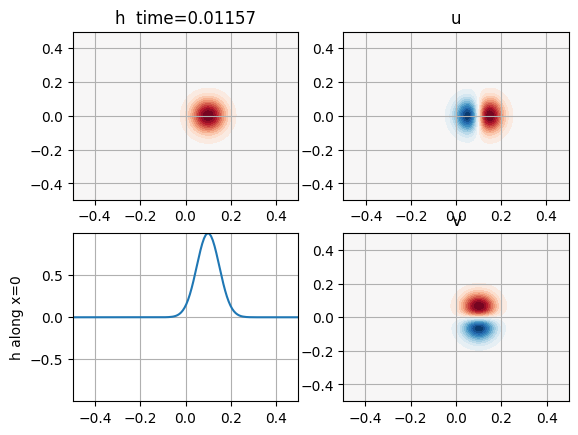

<Figure size 640x480 with 0 Axes>

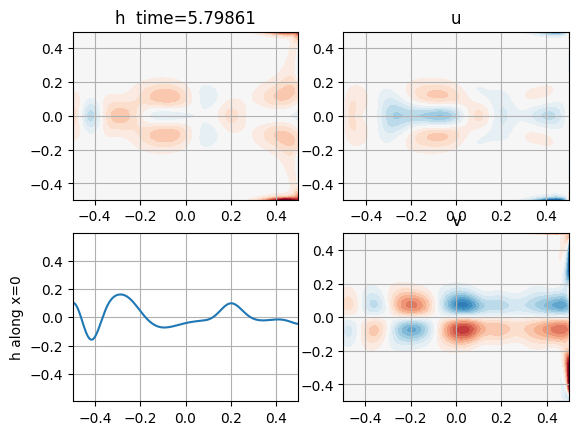

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quick Check plot
plot_check()

In [ ]:
# Video
#video_waves(ua,va,ha,ta)

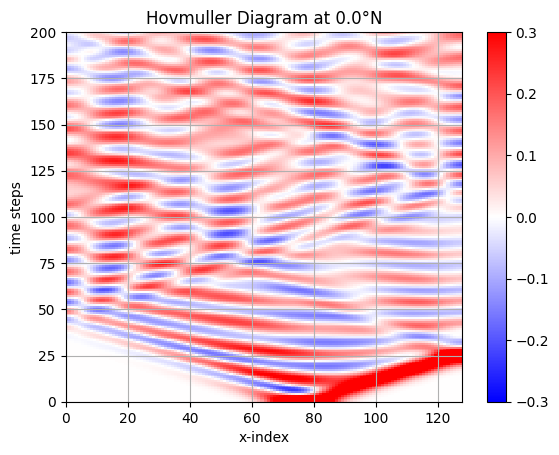

In [ ]:
# HOVMULLER DIAGRAMM
plot_hovmuller(ha,phi,0.3)

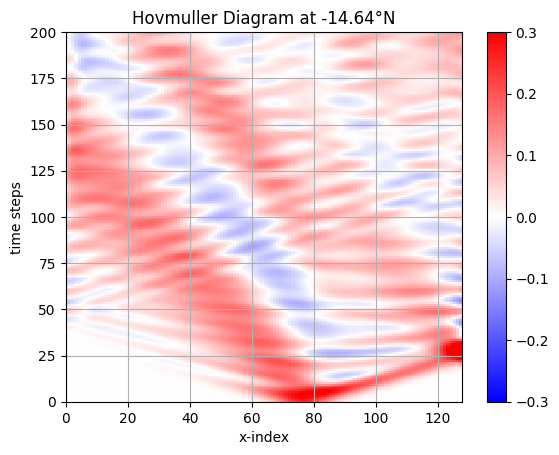

In [ ]:
plot_hovmuller(ha,phi,0.3,50)

In [ ]:
print(2e3/2.5/128)

6.25


- How does this last simulation compare with the previous one?

This experiment is the same as EXP5 with the difference that this time the boundary conditions were chosen such that all four sides are walls, as a consequence, once they reach the right side of the box, the Kelvin waves which previously traveled east "forever" now travel along the sides of the box : the North (South) hemisphere equatorial Kelvin wave first goes east then hits the right side of the box and travels north (south) as a coastal Kelvin wave with the wall on its right (left), it then transforms into a Rossby wave and goes west more slowly then south (north) back to the equator to become a Kelvin wave again. We thus have Poincarré waves, Kelvin waves and two sets of Rossby waves : the ones from the start just like in EXP5 and those that started as Kelvin waves.
